**Dataset**

In [ ]:
import pandas as pd
dataset = pd.read_csv (r'/content/emails.csv')

from sklearn.preprocessing import LabelEncoder

**Hyperparameters Tuning of Models**

In [ ]:
Y= dataset["Prediction"]
X= dataset.drop(columns=["Email No.","Prediction"])
# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the data in X
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(5172, 3000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y, test_size=0.2, random_state=42)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import accuracy_score


# # Define the models
# Models = {
#     "LR": LogisticRegression(max_iter=1000),
#     "DT": DecisionTreeClassifier(),
#     "RF": RandomForestClassifier(),
#     "GB": GradientBoostingClassifier()
# }

# # Define the parameter grid for each model
# param_grid = {
#     "LR": {
#         "C": [0.1, 1, 10, 100],
#         "solver": ['newton-cg', 'lbfgs', 'liblinear']
#     },
#     "DT": {
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20, 30],
#         "min_samples_split": [2, 5, 10]
#     },
#     "RF": {
#         "n_estimators": [10, 50, 100],
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20, 30],
#         "min_samples_split": [2, 5, 10]
#     },
#     "GB": {
#         "n_estimators": [10, 50, 100],
#         "learning_rate": [0.01, 0.1, 0.5, 1.0],
#         "max_depth": [3, 5, 7]
#     }
# }

# # Perform grid search for each model
# best_models = {}
# for model_name in Models:
#     print(f"Performing grid search for {model_name}...")
#     grid_search = GridSearchCV(Models[model_name], param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, Y_train)
#     best_models[model_name] = grid_search.best_estimator_
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")

# # Evaluate the best models on the test set
# for model_name in best_models:
#     best_model = best_models[model_name]
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(Y_test, y_pred)
#     print(f"Test set accuracy for best {model_name}: {accuracy:.4f}")


Performing grid search for LR...
Best parameters for LR: {'C': 0.1, 'solver': 'newton-cg'}
Best cross-validation accuracy for LR: 0.9737
Performing grid search for DT...
Best parameters for DT: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
Best cross-validation accuracy for DT: 0.9277
Performing grid search for RF...
Best parameters for RF: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy for RF: 0.9741
Performing grid search for GB...


KeyboardInterrupt: 

Performing grid search for LR...
Best parameters for LR: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation accuracy for LR: 0.9737
Test set accuracy for best LR: 0.9758
Performing grid search for DT...
Best parameters for DT: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best cross-validation accuracy for DT: 0.9270
Test set accuracy for best DT: 0.9179
Performing grid search for RF...
Best parameters for RF: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy for RF: 0.9650
Test set accuracy for best RF: 0.9720
Performing grid search for GB...
Best parameters for GB: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best cross-validation accuracy for GB: 0.9623
Test set accuracy for best GB: 0.9700


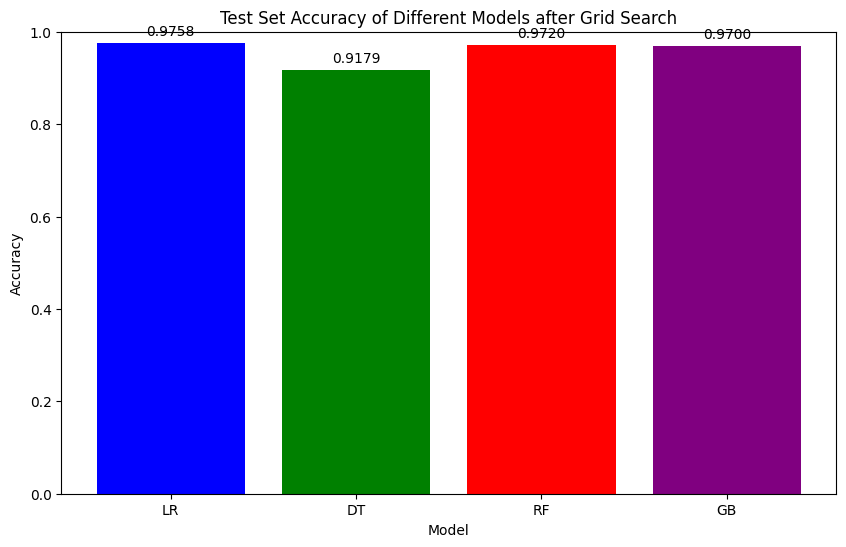

In [ ]:
# Define the models
Models = {
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier()
}

# Define the parameter grid for each model with a more restricted parameter grid
param_grid = {
    "LR": {
        "C": [0.1, 1, 10],  # Reduced number of values
        "solver": ['lbfgs', 'liblinear']  # Fewer solvers
    },
    "DT": {
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 10, 20],  # Fewer max_depth options
        "min_samples_split": [2, 5]  # Reduced number of values
    },
    "RF": {
        "n_estimators": [10, 50],  # Reduced number of values
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 10, 20],  # Fewer max_depth options
        "min_samples_split": [2, 5]  # Reduced number of values
    },
    "GB": {
        "n_estimators": [10, 50],  # Reduced number of values
        "learning_rate": [0.01, 0.1],  # Reduced number of values
        "max_depth": [3, 5]  # Reduced number of values
    }
}
# param_distributions = {
#     "LR": {
#         "C": uniform(0.1, 10),  # Reduced range
#         "solver": ['lbfgs', 'liblinear']  # Fewer solvers
#     },
#     "DT": {
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20],  # Fewer max_depth options
#         "min_samples_split": randint(2, 6)  # Reduced range
#     },
#     "RF": {
#         "n_estimators": randint(10, 51),  # Reduced range
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20],  # Fewer max_depth options
#         "min_samples_split": randint(2, 6)  # Reduced range
#     },
#     "GB": {
#         "n_estimators": randint(10, 51),  # Reduced range
#         "learning_rate": uniform(0.01, 0.2),  # Reduced range
#         "max_depth": randint(3, 6)  # Reduced range
#     }
# }

# Perform grid search for each model
best_models = {}
test_accuracies = {}
for model_name in Models:
    print(f"Performing grid search for {model_name}...")
    grid_search = GridSearchCV(Models[model_name], param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
    # Evaluate the best model on the test set
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies[model_name] = accuracy
    print(f"Test set accuracy for best {model_name}: {accuracy:.4f}")

# Plot the test set accuracies
model_names = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy of Different Models after Grid Search')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

**Random Grid Search**

Performing random search for LR...
Best parameters for LR: {'C': 3.845401188473625, 'solver': 'lbfgs'}
Best cross-validation accuracy for LR: 0.9671
Test set accuracy for best LR: 0.9671
Performing random search for DT...
Best parameters for DT: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best cross-validation accuracy for DT: 0.9270
Test set accuracy for best DT: 0.9246
Performing random search for RF...
Best parameters for RF: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 28}
Best cross-validation accuracy for RF: 0.9594
Test set accuracy for best RF: 0.9691
Performing random search for GB...
Best parameters for GB: {'learning_rate': 0.15639878836228102, 'max_depth': 3, 'n_estimators': 30}
Best cross-validation accuracy for GB: 0.9425
Test set accuracy for best GB: 0.9527


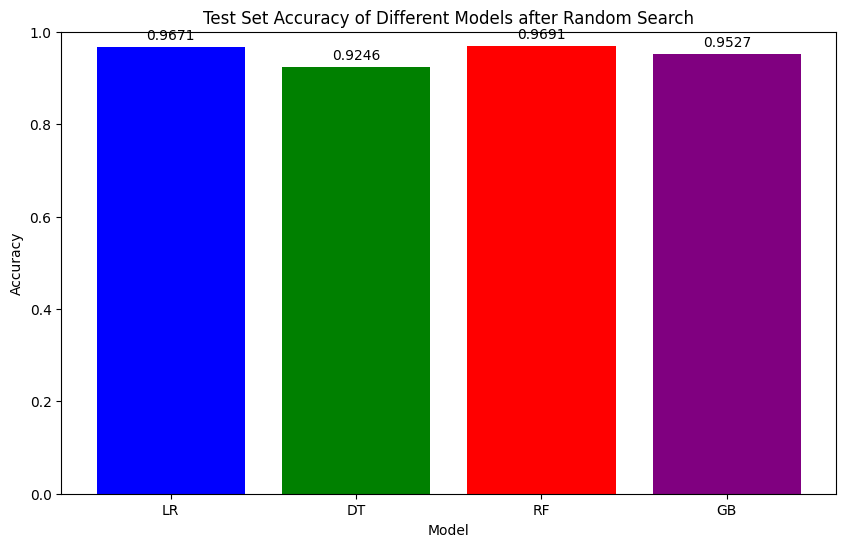

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import  RandomizedSearchCV
# Define the models
Models = {
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier()
}

# Define the parameter distributions for each model
# param_distributions = {
#     "LR": {
#         "C": uniform(0.01, 100),
#         "solver": ['newton-cg', 'lbfgs', 'liblinear']
#     },
#     "DT": {
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20, 30],
#         "min_samples_split": randint(2, 11)
#     },
#     "RF": {
#         "n_estimators": randint(10, 201),
#         "criterion": ['gini', 'entropy'],
#         "max_depth": [None, 10, 20, 30],
#         "min_samples_split": randint(2, 11)
#     },
#     "GB": {
#         "n_estimators": randint(10, 201),
#         "learning_rate": uniform(0.01, 1.0),
#         "max_depth": randint(3, 11)
#     }
# }
from scipy.stats import uniform, randint

# Define the parameter distributions for each model with a more restricted parameter grid
param_distributions = {
    "LR": {
        "C": uniform(0.1, 10),  # Reduced range
        "solver": ['lbfgs', 'liblinear']  # Fewer solvers
    },
    "DT": {
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 10, 20],  # Fewer max_depth options
        "min_samples_split": randint(2, 6)  # Reduced range
    },
    "RF": {
        "n_estimators": randint(10, 51),  # Reduced range
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 10, 20],  # Fewer max_depth options
        "min_samples_split": randint(2, 6)  # Reduced range
    },
    "GB": {
        "n_estimators": randint(10, 51),  # Reduced range
        "learning_rate": uniform(0.01, 0.2),  # Reduced range
        "max_depth": randint(3, 6)  # Reduced range
    }
}


# Perform random search for each model
best_models = {}
test_accuracies = {}
for model_name in Models:
    print(f"Performing random search for {model_name}...")
    random_search = RandomizedSearchCV(Models[model_name], param_distributions[model_name], cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, Y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {random_search.best_score_:.4f}")
    # Evaluate the best model on the test set
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies[model_name] = accuracy
    print(f"Test set accuracy for best {model_name}: {accuracy:.4f}")

# Plot the test set accuracies
model_names = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy of Different Models after Random Search')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

